<a href="https://colab.research.google.com/github/R-Damanhuri/RakaminVIX-HCI/blob/main/Rakamin_VIX_HCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATASET

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
app_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VIX/application_train.csv")
app_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VIX/application_test.csv")
prev_app = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VIX/previous_application.csv")

# DESCRIBE

## SHAPE-COLUMNS

In [4]:
print("app_train.shape: ", app_train.shape)
print("app_test.shape: ", app_test.shape)
print("prev_app.shape: ", prev_app.shape)

app_train.shape:  (307511, 122)
app_test.shape:  (48744, 121)
prev_app.shape:  (1670214, 37)


In [5]:
print("app_train columns:", app_train.columns.tolist())
print("app_test columns:", app_test.columns.tolist())
print("prev_app columns:", prev_app.columns.tolist())

app_train columns: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'CO

## TARGET

Berdasarkan deskripsi kolom dan value kolom, target adalah sebagai berikut.<br>
Kolom TARGET pada app_train terkait kesulitan orang dalam membayar kredit. (1: kesulitan, 0: tidak).

In [6]:
app_train['TARGET'].unique()

array([1, 0])

In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
app_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Data tidak seimbang karena mengandung lebih banyak data target 0.

Target pendukung dari dataset lain yang dapat digunakan adalah sebagai berikut.<br>
*   NAME_CONTRACT_STATUS pada prev_app terkait status pengajuan pinjaman sebelumnya (Approved, Refused, Canceled, Unused offer).



In [9]:
prev_app['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [10]:
prev_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [11]:
prev_app['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

Data tidak seimbang karena mengandung lebih banyak data approved.

# EXPLORATION

## GENERAL INFORMATION

### APP_TRAIN

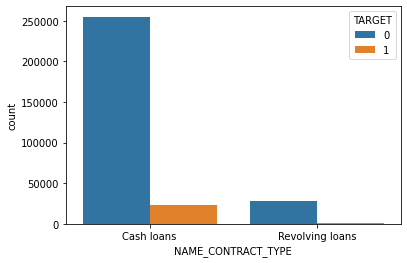

In [12]:
sns.countplot(data = app_train, x = 'NAME_CONTRACT_TYPE', hue = 'TARGET')

Mayoritas pengkredit mengambil tipe kontrak cash loans daripada revolving loans, baik untuk yang kesulitan membayar maupun tidak.

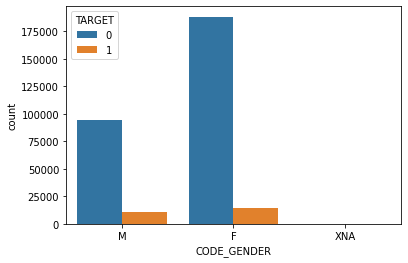

In [13]:
sns.countplot(data = app_train, x = 'CODE_GENDER', hue = 'TARGET')

In [14]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Mayoritas pengkredit berjenis kelamin perempuan, baik untuk golongan kesulitan membayar maupun tidak. Terdapat data XNA di luar jenis kelamin yang seharusnya. Karena jumlahnya sedikit, maka dapat dihapus pada proses ke depan.

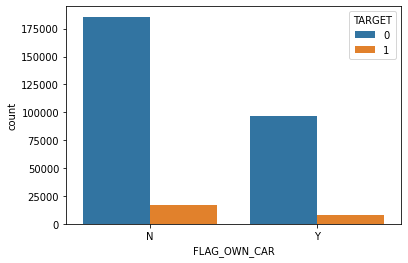

In [15]:
sns.countplot(data = app_train, x = 'FLAG_OWN_CAR', hue = 'TARGET')

Mayoritas pengkredit tidak memiliki mobil, baik yang kesulitan membayar maupun tidak.

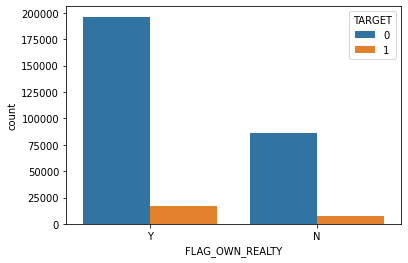

In [16]:
sns.countplot(data = app_train, x = 'FLAG_OWN_REALTY', hue = 'TARGET')

Mayoritas pengkredit memiliki aset rumah, baik yang kesulitan membayar maupun tidak.

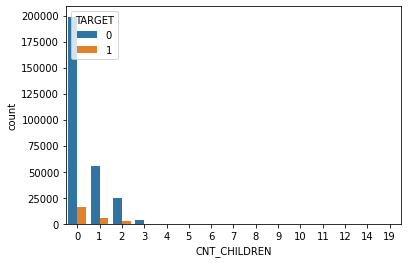

In [17]:
sns.countplot(data = app_train, x = 'CNT_CHILDREN', hue = 'TARGET')

In [18]:
app_train['CNT_CHILDREN'].groupby(app_train['TARGET']).value_counts()

TARGET  CNT_CHILDREN
0       0               198762
        1                55665
        2                24416
        3                 3359
        4                  374
        5                   77
        6                   15
        7                    7
        14                   3
        8                    2
        10                   2
        12                   2
        19                   2
1       0                16609
        1                 5454
        2                 2333
        3                  358
        4                   55
        5                    7
        6                    6
        9                    2
        11                   1
Name: CNT_CHILDREN, dtype: int64

Pengkredit bermasalah maupun tidak, sama-sama memiliki distribusi jumlah anak yang mirip, dengan mayoritas memiliki 0 anak.

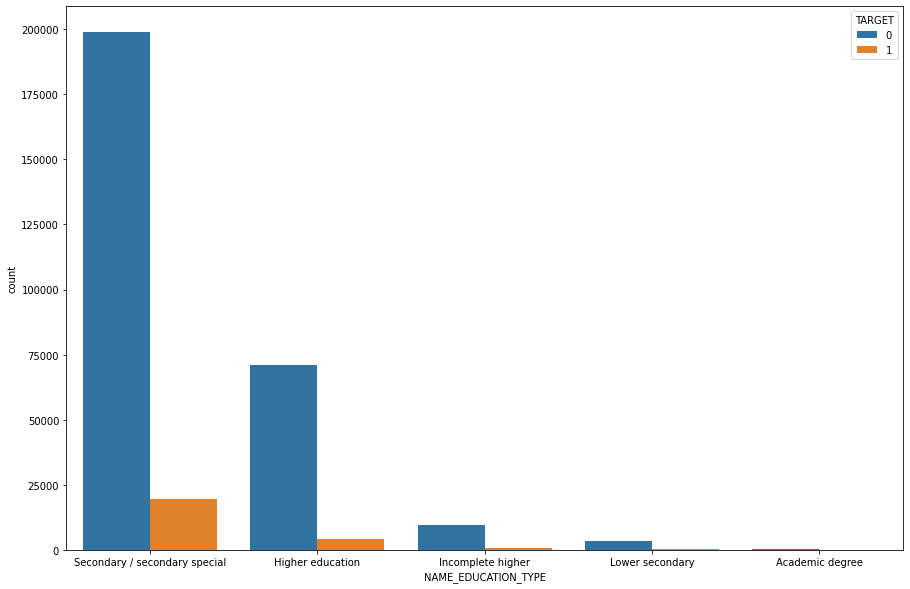

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data = app_train, x = 'NAME_EDUCATION_TYPE', hue = 'TARGET')

In [20]:
app_train['NAME_EDUCATION_TYPE'].groupby(app_train['TARGET']).value_counts()

TARGET  NAME_EDUCATION_TYPE          
0       Secondary / secondary special    198867
        Higher education                  70854
        Incomplete higher                  9405
        Lower secondary                    3399
        Academic degree                     161
1       Secondary / secondary special     19524
        Higher education                   4009
        Incomplete higher                   872
        Lower secondary                     417
        Academic degree                       3
Name: NAME_EDUCATION_TYPE, dtype: int64

Pengkredit bermasalah maupun tidak, sama-sama memiliki persebaran tingkat edukasi yang sama.

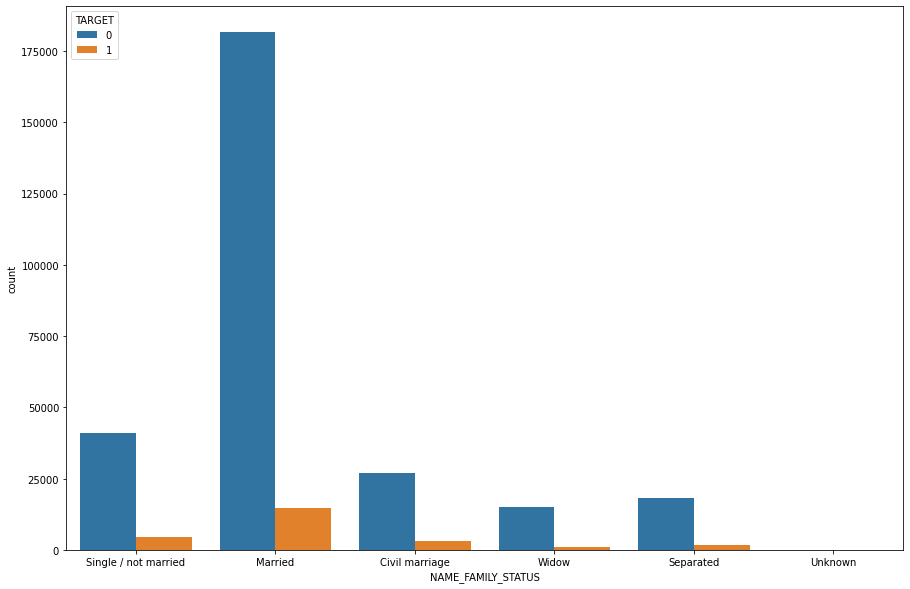

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data = app_train, x = 'NAME_FAMILY_STATUS', hue = 'TARGET')

In [22]:
app_train['NAME_FAMILY_STATUS'].groupby(app_train['TARGET']).value_counts()

TARGET  NAME_FAMILY_STATUS  
0       Married                 181582
        Single / not married     40987
        Civil marriage           26814
        Separated                18150
        Widow                    15151
        Unknown                      2
1       Married                  14850
        Single / not married      4457
        Civil marriage            2961
        Separated                 1620
        Widow                      937
Name: NAME_FAMILY_STATUS, dtype: int64

Pengkredit bermasalah maupun tidak, sama-sama memiliki distribusi status pernikahan yang sama. Terdapat data unknown berjumlah sedikit, yang dapat dihapus pada proses ke depan.

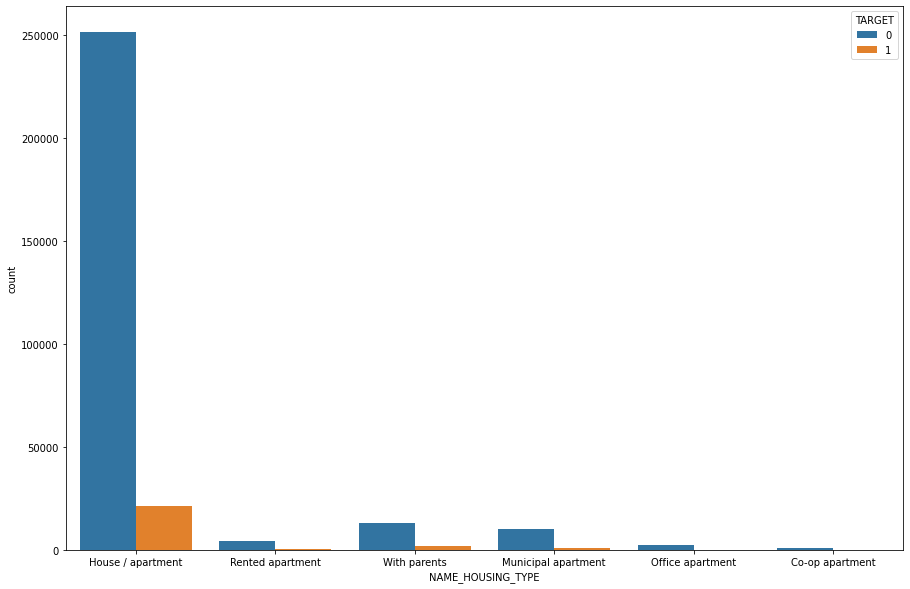

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data = app_train, x = 'NAME_HOUSING_TYPE', hue = 'TARGET')

In [24]:
app_train['NAME_HOUSING_TYPE'].groupby(app_train['TARGET']).value_counts()

TARGET  NAME_HOUSING_TYPE  
0       House / apartment      251596
        With parents            13104
        Municipal apartment     10228
        Rented apartment         4280
        Office apartment         2445
        Co-op apartment          1033
1       House / apartment       21272
        With parents             1736
        Municipal apartment       955
        Rented apartment          601
        Office apartment          172
        Co-op apartment            89
Name: NAME_HOUSING_TYPE, dtype: int64

Pengkredit bermasalah maupun tidak, sama-sama memiliki distribusi jenis rumah yang sama.

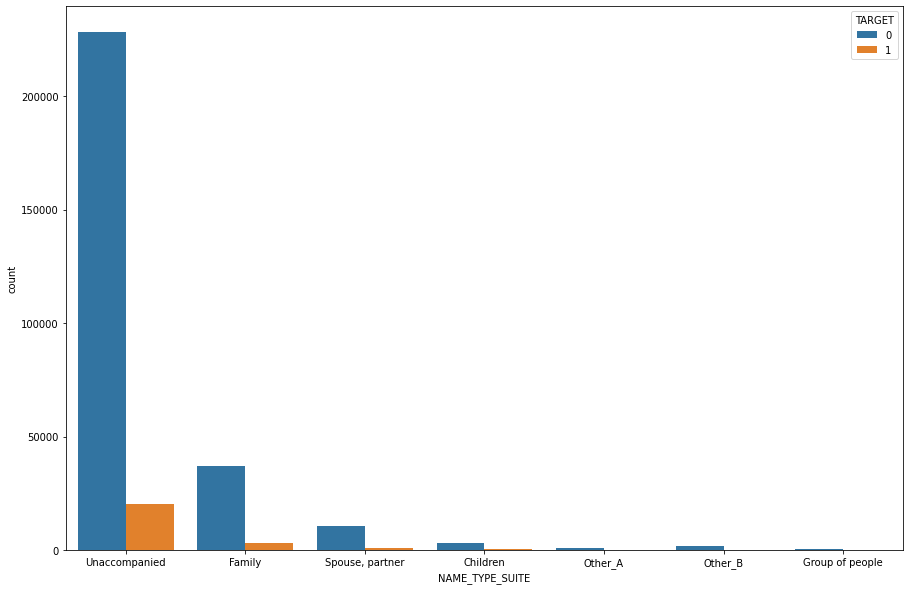

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data = app_train, x = 'NAME_TYPE_SUITE', hue = 'TARGET')

In [26]:
app_train['NAME_TYPE_SUITE'].groupby(app_train['TARGET']).value_counts()

TARGET  NAME_TYPE_SUITE
0       Unaccompanied      228189
        Family              37140
        Spouse, partner     10475
        Children             3026
        Other_B              1596
        Other_A               790
        Group of people       248
1       Unaccompanied       20337
        Family               3009
        Spouse, partner       895
        Children              241
        Other_B               174
        Other_A                76
        Group of people        23
Name: NAME_TYPE_SUITE, dtype: int64

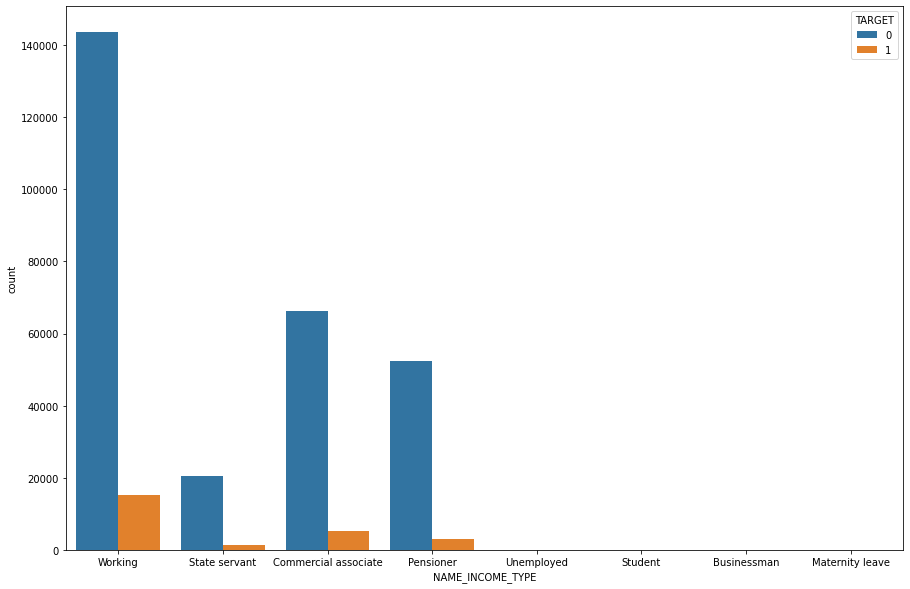

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data = app_train, x = 'NAME_INCOME_TYPE', hue = 'TARGET')

In [28]:
app_train['NAME_INCOME_TYPE'].groupby(app_train['TARGET']).value_counts()

TARGET  NAME_INCOME_TYPE    
0       Working                 143550
        Commercial associate     66257
        Pensioner                52380
        State servant            20454
        Student                     18
        Unemployed                  14
        Businessman                 10
        Maternity leave              3
1       Working                  15224
        Commercial associate      5360
        Pensioner                 2982
        State servant             1249
        Unemployed                   8
        Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

### PREV_APP

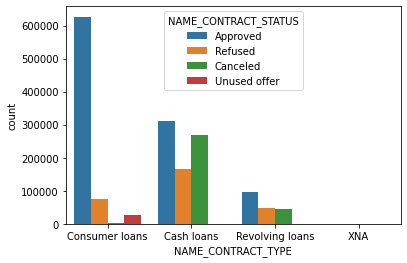

In [29]:
sns.countplot(data = prev_app, x = 'NAME_CONTRACT_TYPE', hue = 'NAME_CONTRACT_STATUS')

In [30]:
prev_app['NAME_CONTRACT_TYPE'].groupby(prev_app['NAME_CONTRACT_STATUS']).value_counts()

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE
Approved              Consumer loans        626470
                      Cash loans            312540
                      Revolving loans        97771
Canceled              Cash loans            268591
                      Revolving loans        45854
                      Consumer loans          1559
                      XNA                      315
Refused               Cash loans            165928
                      Consumer loans         75185
                      Revolving loans        49534
                      XNA                       31
Unused offer          Consumer loans         25937
                      Cash loans               494
                      Revolving loans            5
Name: NAME_CONTRACT_TYPE, dtype: int64

Pengajuan kredit sebelumnyapaling banyak diterima jenis consumer loans, paling banyak ditolak dan dibatalkan adalah cash loans

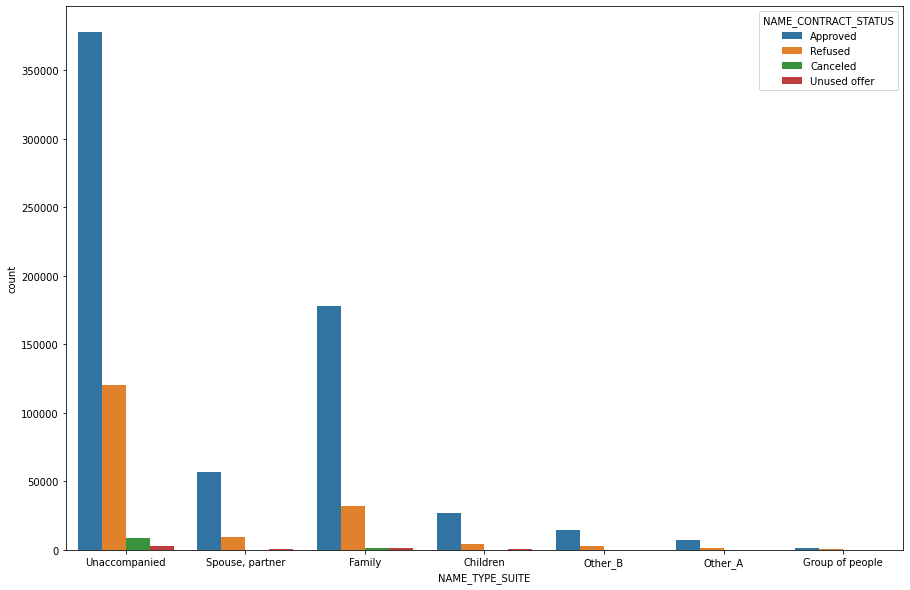

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data = prev_app, x = 'NAME_TYPE_SUITE', hue = 'NAME_CONTRACT_STATUS')

In [32]:
prev_app['NAME_TYPE_SUITE'].groupby(prev_app['NAME_CONTRACT_STATUS']).value_counts()

NAME_CONTRACT_STATUS  NAME_TYPE_SUITE
Approved              Unaccompanied      377800
                      Family             178340
                      Spouse, partner     57165
                      Children            27079
                      Other_B             14668
                      Other_A              7560
                      Group of people      1725
Canceled              Unaccompanied        8463
                      Family               1200
                      Spouse, partner       191
                      Children               81
                      Other_B                25
                      Group of people        11
                      Other_A                 9
Refused               Unaccompanied      120141
                      Family              32039
                      Spouse, partner      9137
                      Children             4023
                      Other_B              2695
                      Other_A              1387
  

Mayoritas pengaju kredit sebelumnya tidak ditemani oleh siapa pun saat pengajuan.

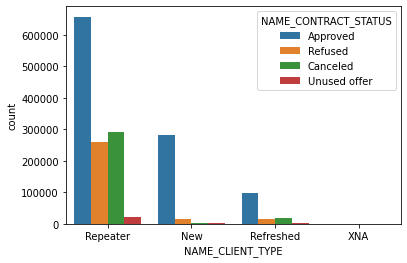

In [33]:
sns.countplot(data = prev_app, x = 'NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS')

In [34]:
prev_app['NAME_CLIENT_TYPE'].groupby(prev_app['NAME_CONTRACT_STATUS']).value_counts()

NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE
Approved              Repeater            657844
                      New                 281259
                      Refreshed            97100
                      XNA                    578
Canceled              Repeater            292232
                      Refreshed            19563
                      New                   3548
                      XNA                    976
Refused               Repeater            260860
                      Refreshed            15033
                      New                  14431
                      XNA                    354
Unused offer          Repeater             20325
                      Refreshed             3953
                      New                   2125
                      XNA                     33
Name: NAME_CLIENT_TYPE, dtype: int64

Pengajuan sebelumnya yang diterima masyoritas dari repeater dan new, sedangkan yang ditolak dan dibatalkan dari repeater dan refreshed.

## CORRELATION BASED

### APP_TRAIN

In [35]:
app_train.corr()['TARGET'][:].sort_values(ascending = True).head(3)

EXT_SOURCE_3   -0.178919
EXT_SOURCE_2   -0.160472
EXT_SOURCE_1   -0.155317
Name: TARGET, dtype: float64

In [36]:
app_train.corr()['TARGET'][:].sort_values(ascending = False).head(4)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
Name: TARGET, dtype: float64

Akan dilakukan eksplorasi terhadap kolom-kolom top 3 yang berkorelasi dengan TARGET.

In [37]:
app_train['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

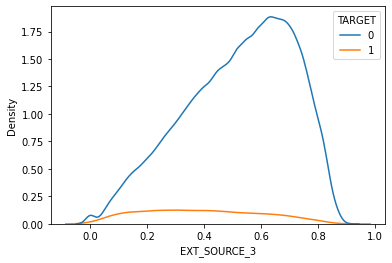

In [38]:
sns.kdeplot(data = app_train, x = 'EXT_SOURCE_3', hue = 'TARGET')

In [39]:
app_train['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

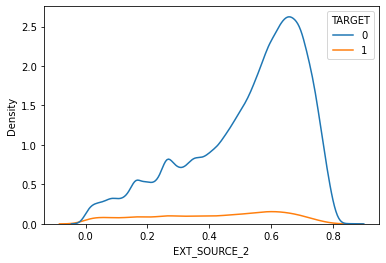

In [40]:
sns.kdeplot(data = app_train, x = 'EXT_SOURCE_2', hue = 'TARGET')

In [41]:
app_train['EXT_SOURCE_1'].value_counts()

0.622707    5
0.443982    5
0.546426    5
0.581015    5
0.499002    5
           ..
0.658473    1
0.318295    1
0.834644    1
0.485406    1
0.734460    1
Name: EXT_SOURCE_1, Length: 114584, dtype: int64

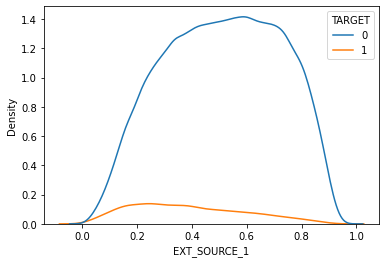

In [42]:
sns.kdeplot(data = app_train, x = 'EXT_SOURCE_1', hue = 'TARGET')

In [43]:
app_train['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

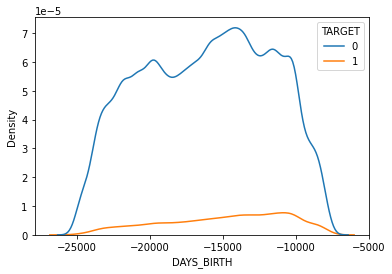

In [44]:
sns.kdeplot(data = app_train, x = 'DAYS_BIRTH', hue = 'TARGET')

In [45]:
app_train['REGION_RATING_CLIENT_W_CITY'].value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

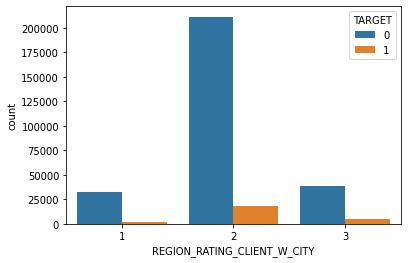

In [46]:
sns.countplot(data = app_train, x = 'REGION_RATING_CLIENT_W_CITY', hue = 'TARGET')

In [47]:
app_train['REGION_RATING_CLIENT'].value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

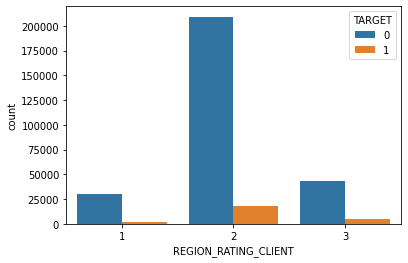

In [48]:
sns.countplot(data = app_train, x = 'REGION_RATING_CLIENT', hue = 'TARGET')

### PREV_APP

Mapping nilai kategorial target agar dapat dihitung menggunakan corr()

In [49]:
prev_app_map = {
    'Approved': 4,
    'Refused':3,
    'Canceled':2,
    'Unused offer':1
}

prev_app['APPROVAL'] = prev_app['NAME_CONTRACT_STATUS'].replace(prev_app_map)

In [50]:
prev_app.corr()['APPROVAL'][:].sort_values(ascending = True).head(3)

DAYS_DECISION   -0.391145
CNT_PAYMENT     -0.271022
AMT_ANNUITY     -0.171295
Name: APPROVAL, dtype: float64

In [51]:
prev_app.corr()['APPROVAL'][:].sort_values(ascending = False).head(4)

APPROVAL             1.000000
AMT_CREDIT           0.150722
RATE_DOWN_PAYMENT    0.149835
AMT_APPLICATION      0.143656
Name: APPROVAL, dtype: float64

In [52]:
prev_app['DAYS_DECISION'].value_counts()

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

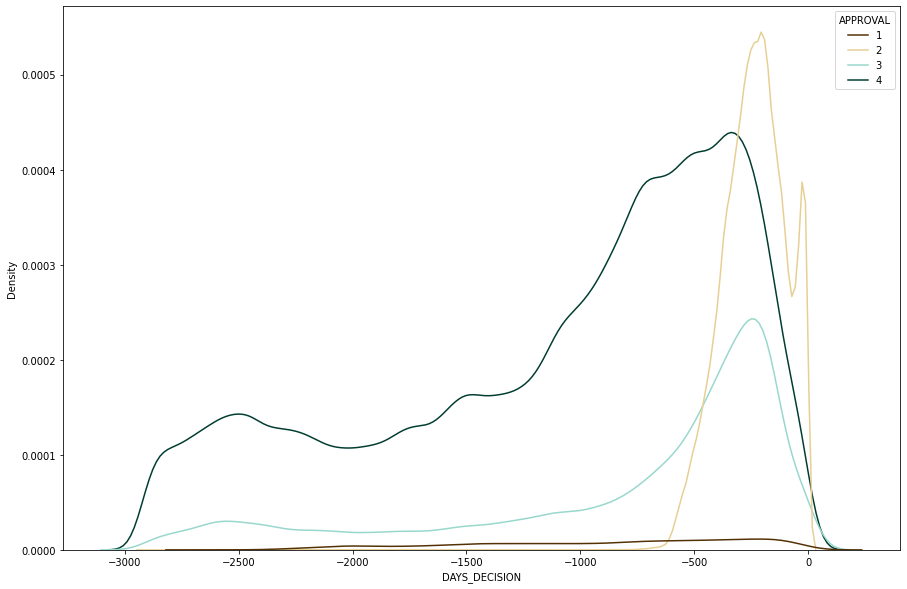

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(data = prev_app, x = 'DAYS_DECISION', hue = 'APPROVAL', palette = "BrBG")

In [54]:
prev_app['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

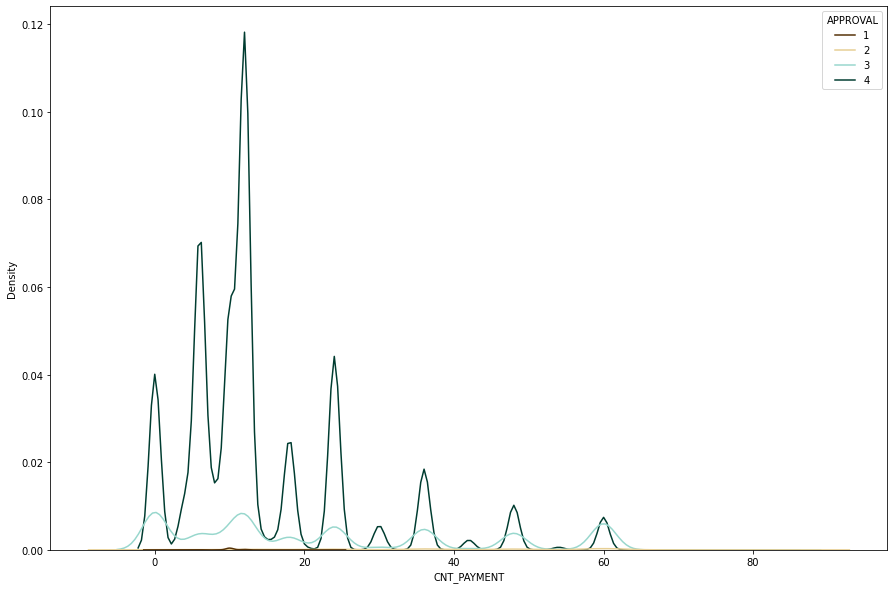

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(data = prev_app, x = 'CNT_PAYMENT', hue = 'APPROVAL', palette = "BrBG")

In [56]:
prev_app['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

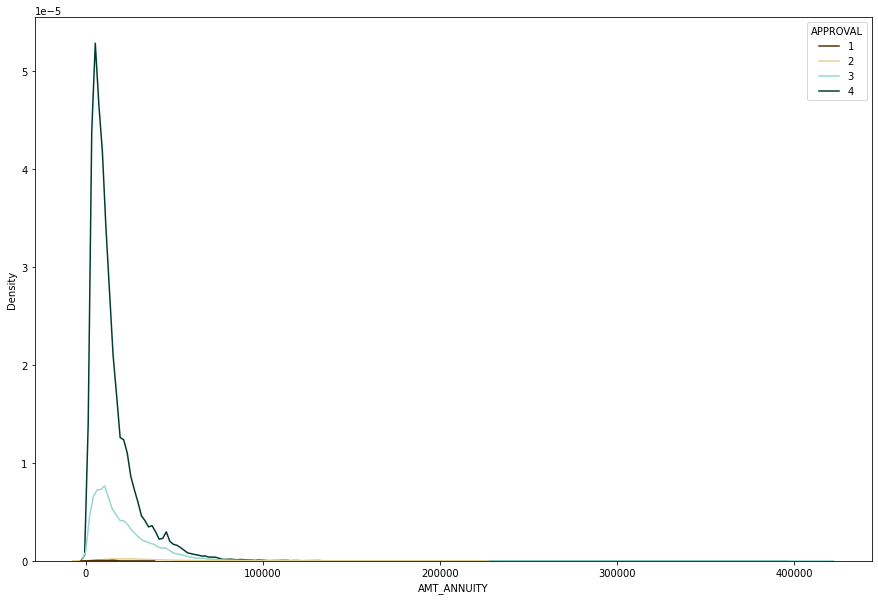

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(data = prev_app, x = 'AMT_ANNUITY', hue = 'APPROVAL', palette = "BrBG")

In [58]:
prev_app['AMT_CREDIT'].value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

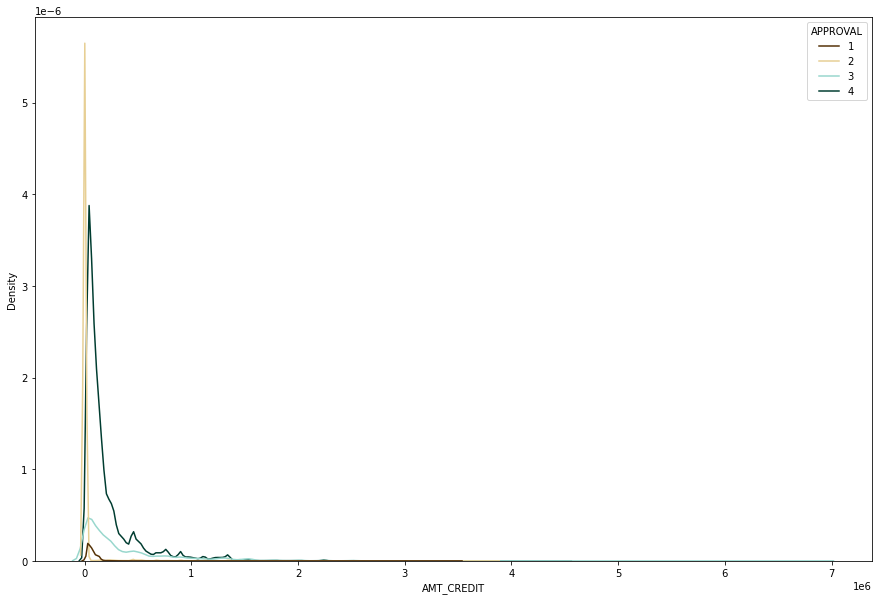

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(data = prev_app, x = 'AMT_CREDIT', hue = 'APPROVAL', palette = "BrBG")

In [60]:
prev_app['RATE_DOWN_PAYMENT'].value_counts()

0.000000    369854
0.108909     36341
0.217818      6482
0.326727      1081
0.544545       746
             ...  
0.217822         1
0.217849         1
0.088663         1
0.155522         1
0.101401         1
Name: RATE_DOWN_PAYMENT, Length: 207033, dtype: int64

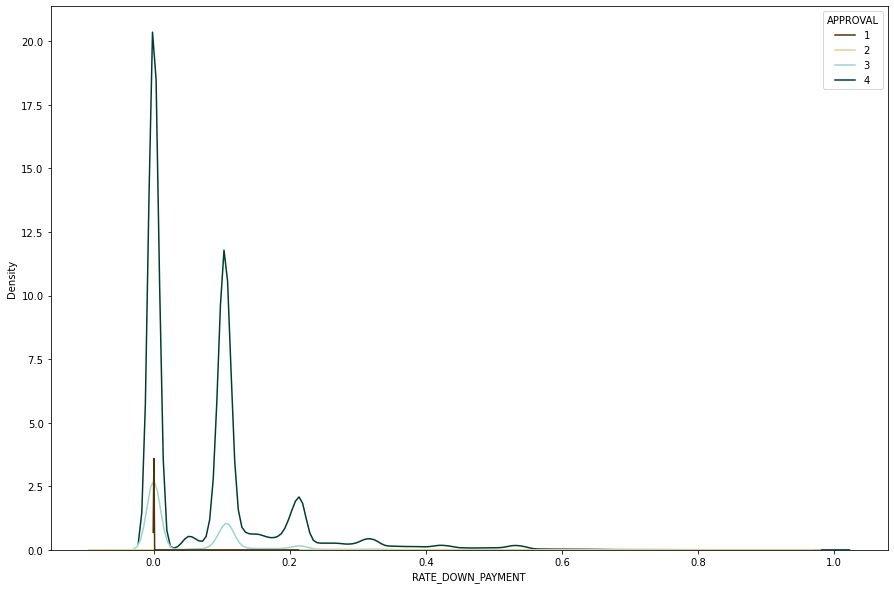

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(data = prev_app, x = 'RATE_DOWN_PAYMENT', hue = 'APPROVAL', palette = "BrBG")

In [62]:
prev_app['AMT_APPLICATION'].value_counts()

0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64

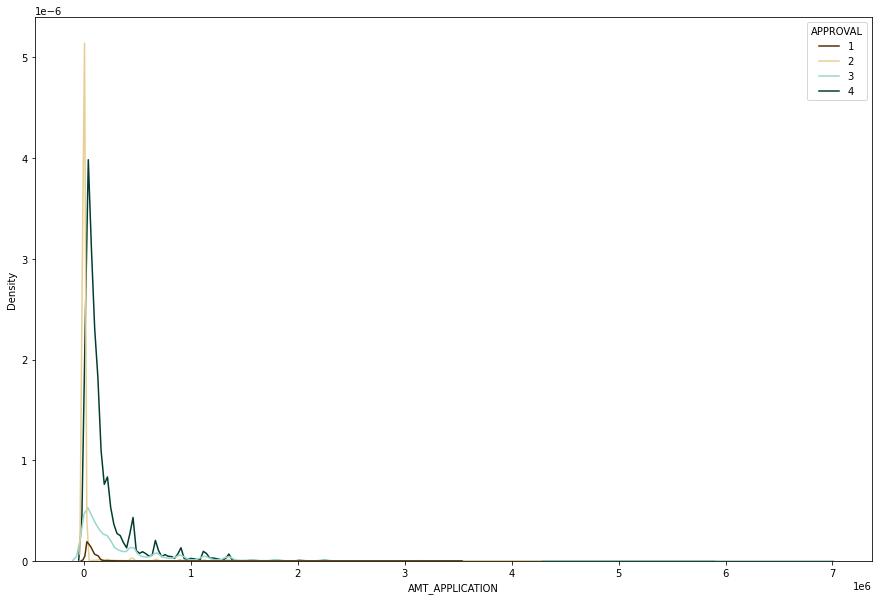

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(data = prev_app, x = 'AMT_APPLICATION', hue = 'APPROVAL', palette = "BrBG")

# CLEAN

## MISSING VALUES

In [64]:
app_train_null = app_train.isnull().sum().reset_index()
app_train_null.columns = ["features", "missing_value"]
app_train_null['Percentage'] = (app_train_null["missing_value"]/app_train.shape[0])*100
app_train_null.sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,76,COMMONAREA_MEDI,214865,69.872297
1,48,COMMONAREA_AVG,214865,69.872297
2,62,COMMONAREA_MODE,214865,69.872297
3,70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...,...,...
117,15,NAME_HOUSING_TYPE,0,0.000000
118,14,NAME_FAMILY_STATUS,0,0.000000
119,13,NAME_EDUCATION_TYPE,0,0.000000
120,12,NAME_INCOME_TYPE,0,0.000000


Drop features yang memiliki persentase missing value lebih dari 25

In [65]:
app_train_to_drop = app_train_null[app_train_null['Percentage']>25]['features']
app_train_to_drop

app_train.drop(app_train_to_drop, axis=1, inplace=True)

In [66]:
app_train_null[app_train_null['Percentage']<=25].sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,43,EXT_SOURCE_3,60965,19.825307
1,121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
2,120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
3,119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
4,118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
...,...,...,...,...
67,34,REG_REGION_NOT_LIVE_REGION,0,0.000000
68,35,REG_REGION_NOT_WORK_REGION,0,0.000000
69,36,LIVE_REGION_NOT_WORK_REGION,0,0.000000
70,37,REG_CITY_NOT_LIVE_CITY,0,0.000000


In [67]:
app_train['EXT_SOURCE_3'].fillna(int(app_train['EXT_SOURCE_3'].mean()), inplace = True)
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(int(app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()), inplace = True)
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(int(app_train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()), inplace = True)
app_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(int(app_train['AMT_REQ_CREDIT_BUREAU_MON'].mean()), inplace = True)
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(int(app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()), inplace = True)
app_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(int(app_train['AMT_REQ_CREDIT_BUREAU_DAY'].mean()), inplace = True)
app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(int(app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()), inplace = True)
app_train['NAME_TYPE_SUITE'].fillna(str(app_train['NAME_TYPE_SUITE'].mode(dropna=True)), inplace = True)
app_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(int(app_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(int(app_train['OBS_30_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(int(app_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(int(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_train['AMT_GOODS_PRICE'].fillna(int(app_train['AMT_GOODS_PRICE'].mean()), inplace = True)
app_train['AMT_ANNUITY'].fillna(int(app_train['AMT_ANNUITY'].mean()), inplace = True)
app_train['CNT_FAM_MEMBERS'].fillna(int(app_train['CNT_FAM_MEMBERS'].mean()), inplace = True)
app_train['EXT_SOURCE_2'].fillna(int(app_train['EXT_SOURCE_2'].mean()), inplace = True)
app_train['DAYS_LAST_PHONE_CHANGE'].fillna(int(app_train['DAYS_LAST_PHONE_CHANGE'].mean()), inplace = True)

In [68]:
print(app_train.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [69]:
app_train.duplicated().sum()

0

In [70]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [71]:
app_train.shape

(307511, 72)

In [72]:
prev_app_null = prev_app.isnull().sum().reset_index()
prev_app_null.columns = ["features", "missing_value"]
prev_app_null['Percentage'] = (prev_app_null["missing_value"]/prev_app.shape[0])*100
prev_app_null.sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,14,RATE_INTEREST_PRIVILEGED,1664263,99.643698
1,13,RATE_INTEREST_PRIMARY,1664263,99.643698
2,12,RATE_DOWN_PAYMENT,895844,53.636480
3,6,AMT_DOWN_PAYMENT,895844,53.636480
4,20,NAME_TYPE_SUITE,820405,49.119754
5,31,DAYS_FIRST_DRAWING,673065,40.298129
6,34,DAYS_LAST_DUE,673065,40.298129
7,32,DAYS_FIRST_DUE,673065,40.298129
8,33,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
9,35,DAYS_TERMINATION,673065,40.298129


Drop features dengan persentase missing value > 25.

In [73]:
prev_app_to_drop = prev_app_null[prev_app_null['Percentage']>25]['features']
prev_app_to_drop

prev_app.drop(prev_app_to_drop, axis=1, inplace=True)

In [74]:
prev_app_null[prev_app_null['Percentage']<=25].sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,7,AMT_GOODS_PRICE,385515,23.081773
1,3,AMT_ANNUITY,372235,22.286665
2,28,CNT_PAYMENT,372230,22.286366
3,30,PRODUCT_COMBINATION,346,0.020716
4,5,AMT_CREDIT,1,0.000060
5,0,SK_ID_PREV,0,0.000000
6,19,CODE_REJECT_REASON,0,0.000000
7,29,NAME_YIELD_GROUP,0,0.000000
8,27,NAME_SELLER_INDUSTRY,0,0.000000
9,26,SELLERPLACE_AREA,0,0.000000


In [75]:
prev_app['AMT_GOODS_PRICE'].fillna(int(prev_app['AMT_GOODS_PRICE'].mean()), inplace = True)
prev_app['AMT_ANNUITY'].fillna(int(prev_app['AMT_ANNUITY'].mean()), inplace = True)
prev_app['CNT_PAYMENT'].fillna(int(prev_app['CNT_PAYMENT'].mean()), inplace = True)
prev_app['PRODUCT_COMBINATION'].fillna(str(prev_app['PRODUCT_COMBINATION'].mode(dropna = True)), inplace = True)
prev_app['AMT_CREDIT'].fillna(int(prev_app['AMT_CREDIT'].mean()), inplace = True)

In [76]:
prev_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
APPROVAL                       0
dtype: int64

In [77]:
prev_app.duplicated().sum()

0

## OUTLIERS

In [78]:
print(app_train.select_dtypes(include=np.number).columns.tolist())

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14'

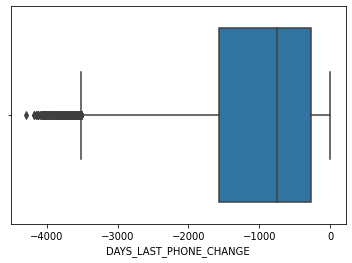

In [79]:
sns.boxplot(x=app_train['DAYS_LAST_PHONE_CHANGE'])

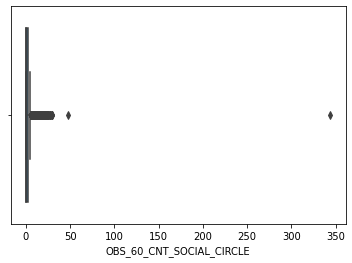

In [80]:
sns.boxplot(x=app_train['OBS_60_CNT_SOCIAL_CIRCLE'])

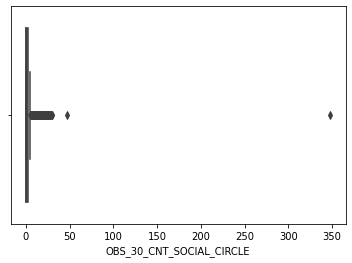

In [81]:
sns.boxplot(x=app_train['OBS_30_CNT_SOCIAL_CIRCLE'])

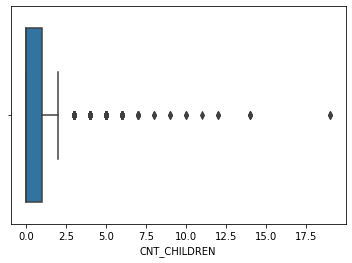

In [82]:
sns.boxplot(x=app_train['CNT_CHILDREN'])

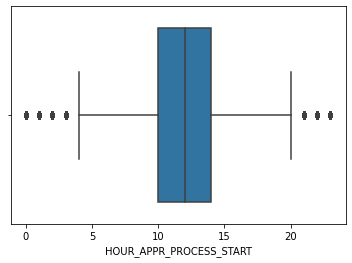

In [83]:
sns.boxplot(x=app_train['HOUR_APPR_PROCESS_START'])

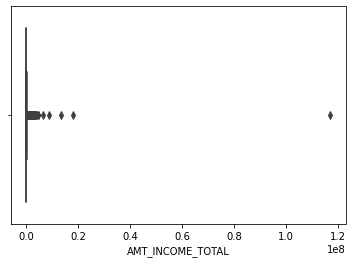

In [84]:
sns.boxplot(x=app_train['AMT_INCOME_TOTAL'])

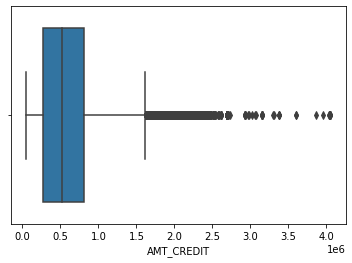

In [85]:
sns.boxplot(x=app_train['AMT_CREDIT'])

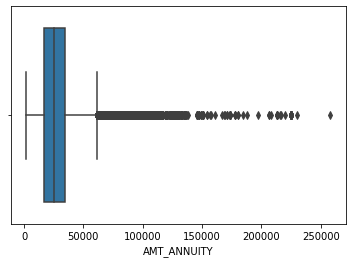

In [86]:
sns.boxplot(x=app_train['AMT_ANNUITY'])

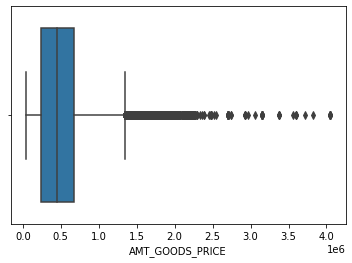

In [87]:
sns.boxplot(x=app_train['AMT_GOODS_PRICE'])

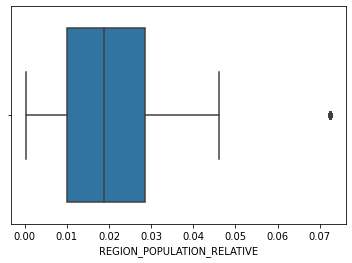

In [88]:
sns.boxplot(x=app_train['REGION_POPULATION_RELATIVE'])

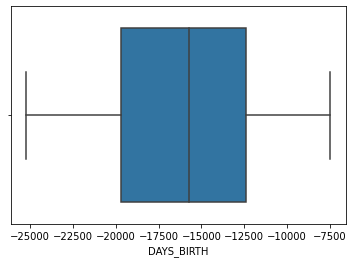

In [89]:
sns.boxplot(x=app_train['DAYS_BIRTH'])

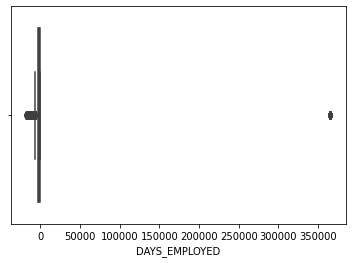

In [90]:
sns.boxplot(x=app_train['DAYS_EMPLOYED'])

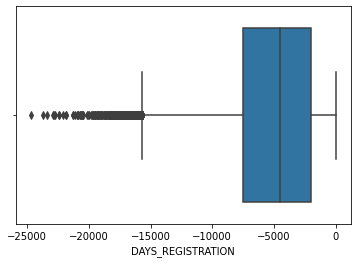

In [91]:
sns.boxplot(x=app_train['DAYS_REGISTRATION'])

In [92]:
app_train_clean = app_train[(app_train['CNT_CHILDREN'] <= 2.5) & (app_train['AMT_INCOME_TOTAL'] <= 0.25e6) & (app_train['AMT_CREDIT'] <= 1.25e6) & (app_train['AMT_ANNUITY'] <= 50000) & (app_train['AMT_GOODS_PRICE'] <= 1e6) & (app_train['REGION_POPULATION_RELATIVE'] <= 0.05) & (app_train['DAYS_EMPLOYED']<= 50000) & (app_train['DAYS_EMPLOYED']> -5000) & (app_train['DAYS_REGISTRATION']>=-13000) & (app_train['HOUR_APPR_PROCESS_START'] > 5) & (app_train['HOUR_APPR_PROCESS_START'] <20) & (app_train['OBS_30_CNT_SOCIAL_CIRCLE']<= 5) & (app_train['OBS_60_CNT_SOCIAL_CIRCLE']<=50) & (app_train['DAYS_LAST_PHONE_CHANGE']>=-3000)]

In [93]:
app_train_clean.shape

(146339, 72)

In [94]:
print(prev_app.select_dtypes(include=np.number).columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'APPROVAL']


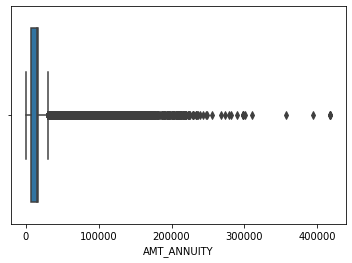

In [95]:
sns.boxplot(x=prev_app['AMT_ANNUITY'])

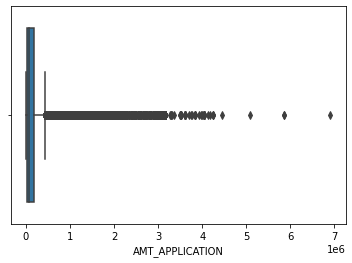

In [96]:
sns.boxplot(x=prev_app['AMT_APPLICATION'])

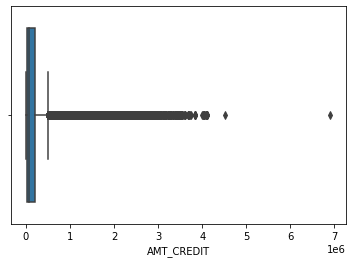

In [97]:
sns.boxplot(x=prev_app['AMT_CREDIT'])

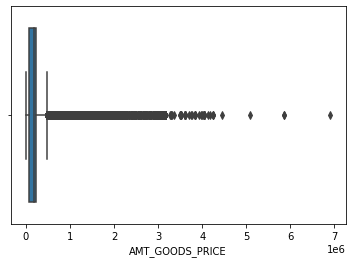

In [98]:
sns.boxplot(x=prev_app['AMT_GOODS_PRICE'])

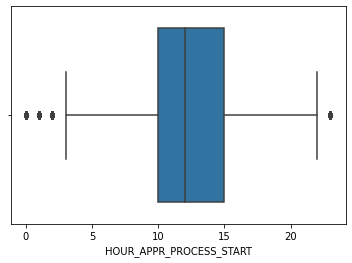

In [99]:
sns.boxplot(x=prev_app['HOUR_APPR_PROCESS_START'])

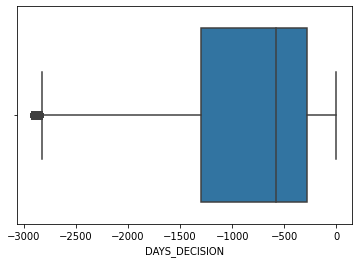

In [100]:
sns.boxplot(x=prev_app['DAYS_DECISION'])

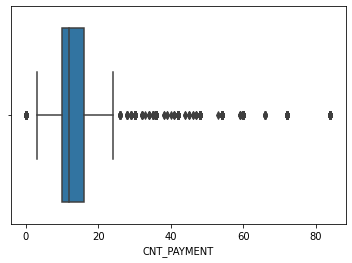

In [101]:
sns.boxplot(x=prev_app['CNT_PAYMENT'])

In [102]:
prev_app_clean = prev_app[(prev_app['AMT_ANNUITY']<=25000)&(prev_app['AMT_APPLICATION']<=0.2e6) & (prev_app['AMT_CREDIT']<=200000) & (prev_app['AMT_GOODS_PRICE']<=1e6) & (prev_app['HOUR_APPR_PROCESS_START']>=5 ) & (prev_app['HOUR_APPR_PROCESS_START']<=20 ) & (prev_app['DAYS_DECISION']>-2500 ) & (prev_app['CNT_PAYMENT']<=25) & (prev_app['CNT_PAYMENT']>=3)]

In [103]:
prev_app_clean.shape

(1022608, 27)

# FEATURES ENGINEERING

Encode feature

In [104]:
atc_obj = app_train_clean.select_dtypes(include='object').copy()
colname_obj = atc_obj.columns

In [105]:
le = LabelEncoder()
app_train_clean = app_train_clean.apply(lambda colname_obj: le.fit_transform(colname_obj))
app_train_clean.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,1,0,1179,1097,4309,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,1,1,0,153,223,492,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,1,0,803,775,5379,...,0,0,0,0,0,0,0,0,0,1


In [106]:
app_train_clean.corr()['TARGET'][:].sort_values(ascending = True).head(10).index

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'HOUR_APPR_PROCESS_START', 'REGION_POPULATION_RELATIVE', 'FLAG_PHONE',
       'FLAG_DOCUMENT_16', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_GOODS_PRICE'],
      dtype='object')

In [107]:
app_train_clean.corr()['TARGET'][:].sort_values(ascending = False).head(11).index

Index(['TARGET', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'CODE_GENDER', 'FLAG_DOCUMENT_3',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_LIVE_CITY'],
      dtype='object')

In [108]:
pac_obj = prev_app_clean.select_dtypes(include='object').copy()
colname_obj2 = pac_obj.columns

In [109]:
prev_app_clean = prev_app_clean.apply(lambda colname_obj2: le.fit_transform(colname_obj2))
prev_app_clean.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,APPROVAL
0,570549,150064,1,2010,1533,1600,1533,2,10,1,...,18,1,0,4,36,2,9,4,13,3
2,844015,19344,0,210137,41226,33499,41226,5,6,1,...,26,0,2,5,0,10,9,1,6,3
6,728492,66242,0,218544,0,0,62877,5,6,1,...,26,2,0,5,0,10,13,0,2,1


In [110]:
prev_app_clean.corr()['APPROVAL'][:].sort_values(ascending = True).head(10).index

Index(['NAME_PORTFOLIO', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'AMT_GOODS_PRICE', 'NAME_SELLER_INDUSTRY', 'AMT_ANNUITY',
       'NAME_GOODS_CATEGORY', 'CNT_PAYMENT', 'DAYS_DECISION',
       'NAME_CLIENT_TYPE'],
      dtype='object')

In [111]:
prev_app_clean.corr()['APPROVAL'][:].sort_values(ascending = False).head(11).index

Index(['APPROVAL', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE',
       'SELLERPLACE_AREA', 'CODE_REJECT_REASON', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

Normalization

In [112]:
atc_norm = app_train_clean.reset_index(drop=True).copy()
atc_imp = atc_norm[['TARGET','SK_ID_CURR']].copy()
atc_norm.drop(['TARGET','SK_ID_CURR'], axis=1, inplace = True)
pac_norm = prev_app_clean.reset_index(drop=True).copy()
pac_imp = pac_norm[['SK_ID_CURR','APPROVAL','SK_ID_PREV']].copy()
pac_norm.drop(['APPROVAL','SK_ID_CURR','SK_ID_PREV'], axis=1, inplace = True)

for i in atc_norm.columns:
  scale = StandardScaler().fit(atc_norm[[i]])
  atc_norm[i] = scale.transform(atc_norm[[i]])

for i in pac_norm.columns:
  scale2 = StandardScaler().fit(pac_norm[[i]])
  pac_norm[i] = scale2.transform(pac_norm[[i]])

In [113]:
atc_norm.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.374279,1.315044,-0.715542,0.692796,-0.68825,1.199853,-0.201845,0.225207,-0.305964,0.433549,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-0.429426
1,2.671804,1.315044,1.397541,0.692796,-0.68825,-1.831293,-1.308218,-1.658043,-1.222431,0.433549,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-1.014726
2,-0.374279,-0.760386,-0.715542,0.692796,-0.68825,0.089024,-0.609456,0.753129,-0.553012,0.433549,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-0.429426
3,-0.374279,1.315044,-0.715542,0.692796,-0.68825,-0.235953,0.280453,-0.078718,0.586595,0.433549,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-1.014726
4,-0.374279,1.315044,-0.715542,0.692796,-0.68825,-0.930221,0.170322,0.528146,0.291732,-0.129107,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,1.386149,-0.429426


In [114]:
atc_norm.insert(loc=0,column='TARGET',value=atc_imp['TARGET'])
atc_norm.insert(loc=1,column='SK_ID_CURR',value=atc_imp['SK_ID_CURR'])

In [115]:
atc_norm.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,-0.374279,1.315044,-0.715542,0.692796,-0.68825,1.199853,-0.201845,0.225207,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-0.429426
1,0,1,2.671804,1.315044,1.397541,0.692796,-0.68825,-1.831293,-1.308218,-1.658043,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-1.014726
2,0,2,-0.374279,-0.760386,-0.715542,0.692796,-0.68825,0.089024,-0.609456,0.753129,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-0.429426
3,0,3,-0.374279,1.315044,-0.715542,0.692796,-0.68825,-0.235953,0.280453,-0.078718,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,-0.385632,-1.014726
4,0,4,-0.374279,1.315044,-0.715542,0.692796,-0.68825,-0.930221,0.170322,0.528146,...,-0.098706,-0.024669,-0.019912,-0.023965,-0.070805,-0.05816,-0.154065,-0.269231,1.386149,-0.429426


In [116]:
pac_norm.insert(loc=0,column='APPROVAL',value=pac_imp['APPROVAL'])
pac_norm.insert(loc=1,column='SK_ID_CURR',value=pac_imp['SK_ID_CURR'])
pac_norm.insert(loc=2,column='SK_ID_PREV',value=pac_imp['SK_ID_PREV'])

In [117]:
pac_norm.head()

,APPROVAL,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,3,150064,570549,0.60022,-2.102046,-0.902031,-0.837381,-1.710915,-0.48839,0.738810,...,0.607758,0.074032,-0.384350,-0.342500,-0.705089,-0.405607,-1.178465,-0.212704,1.511853,1.213384
1,3,19344,844015,-1.17032,0.756739,1.224261,1.565672,0.123007,0.98287,-0.506205,...,0.607758,0.954578,-1.949306,3.175709,0.105124,-0.484360,1.145117,-0.212704,-0.377360,-0.338195
2,1,66242,728492,-1.17032,0.872216,-0.984151,-0.957914,1.123341,0.98287,-0.506205,...,0.607758,0.954578,1.180607,-0.342500,0.105124,-0.484360,1.145117,0.673120,-1.007098,-1.224812
3,1,171351,362603,-1.17032,0.872216,-0.984151,-0.957914,1.123341,-0.97881,-1.751220,...,0.607758,0.954578,1.180607,-0.342500,0.105124,-0.484360,1.145117,0.673120,-1.007098,-1.224812
4,1,211493,757578,-1.17032,0.872216,-0.984151,-0.957914,1.123341,-0.97881,0.738810,...,0.607758,0.954578,1.180607,-0.342500,0.105124,-0.484360,1.145117,0.673120,-1.007098,-1.224812


# MERGE

In [118]:
atc_merge = atc_norm[['SK_ID_CURR','TARGET', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'CODE_GENDER', 'FLAG_DOCUMENT_3','DAYS_ID_PUBLISH', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR','HOUR_APPR_PROCESS_START', 'REGION_POPULATION_RELATIVE', 'FLAG_PHONE','FLAG_DOCUMENT_16', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_GOODS_PRICE']].reset_index(drop = True)

In [119]:
atc_merge.head()

,SK_ID_CURR,TARGET,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_BIRTH,CODE_GENDER,FLAG_DOCUMENT_3,...,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,FLAG_PHONE,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_MON,AMT_GOODS_PRICE
0,0,1,0.822359,-0.317669,0.604595,-0.181275,-0.217395,1.304383,1.315044,0.553408,...,-1.233165,-0.536271,-0.374279,-0.715542,-0.746967,0.311496,1.693283,-0.106132,-0.269231,-0.305964
1,1,0,1.158080,0.099431,0.604595,-0.181275,-0.217395,-1.341630,1.315044,-1.806986,...,0.197426,1.067088,2.671804,1.397541,-1.080857,-0.508442,1.693283,-0.106132,-0.269231,-1.222431
2,2,0,-1.134927,0.358321,0.604595,-0.181275,-0.217395,-1.330304,-0.760386,0.553408,...,0.861464,-1.675067,-0.374279,-0.715542,1.590260,-1.174642,-0.590569,-0.106132,-0.269231,-0.553012
3,3,0,-1.134112,-0.281058,0.604595,-0.181275,-0.217395,-1.586370,1.315044,-1.806986,...,-1.004811,-1.675067,-0.374279,-0.715542,-0.413078,0.875204,-0.590569,-0.106132,-0.269231,0.586595
4,4,0,0.047430,-2.150816,0.604595,-0.181275,-0.217395,-0.760164,1.315044,0.553408,...,-0.875104,0.783416,-0.374279,-0.715542,1.256371,1.080188,1.693283,-0.106132,-0.269231,0.291732


In [120]:
pac_merge = pac_norm[['SK_ID_CURR','SK_ID_PREV', 'APPROVAL', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE',
       'SELLERPLACE_AREA', 'CODE_REJECT_REASON', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'HOUR_APPR_PROCESS_START', 'NAME_PORTFOLIO', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'AMT_GOODS_PRICE', 'NAME_SELLER_INDUSTRY', 'AMT_ANNUITY',
       'NAME_GOODS_CATEGORY', 'CNT_PAYMENT', 'DAYS_DECISION',
       'NAME_CLIENT_TYPE']].reset_index(drop = True)

In [121]:
pac_merge.head()

,SK_ID_CURR,SK_ID_PREV,APPROVAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_TYPE,SELLERPLACE_AREA,CODE_REJECT_REASON,...,NAME_PORTFOLIO,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,AMT_GOODS_PRICE,NAME_SELLER_INDUSTRY,AMT_ANNUITY,NAME_GOODS_CATEGORY,CNT_PAYMENT,DAYS_DECISION,NAME_CLIENT_TYPE
0,150064,570549,3,1.511853,1.213384,-0.902031,-0.837381,0.60022,-0.405607,0.371293,...,-0.384350,-0.743555,-0.821115,-1.710915,-1.178465,-2.102046,0.074032,-0.212704,1.055048,0.607758
1,19344,844015,3,-0.377360,-0.338195,1.224261,1.565672,-1.17032,-0.484360,0.371293,...,-1.949306,-0.743555,-0.821115,0.123007,1.145117,0.756739,0.954578,-0.212704,0.732952,0.607758
2,66242,728492,1,-1.007098,-1.224812,-0.984151,-0.957914,-1.17032,-0.484360,0.371293,...,1.180607,0.546411,1.224593,1.123341,1.145117,0.872216,0.954578,0.673120,1.138398,0.607758
3,171351,362603,1,-1.007098,-1.224812,-0.984151,-0.957914,-1.17032,-0.484360,0.371293,...,1.180607,0.546411,1.224593,1.123341,1.145117,0.872216,0.954578,0.673120,1.128509,0.607758
4,211493,757578,1,-1.007098,-1.224812,-0.984151,-0.957914,-1.17032,-0.484360,0.371293,...,1.180607,0.546411,1.224593,1.123341,1.145117,0.872216,0.954578,0.673120,0.612872,0.607758


In [122]:
df_join = atc_merge.merge(pac_merge, left_on='SK_ID_CURR', right_on='SK_ID_CURR', suffixes=('_train', '_prev'))

In [123]:
df_join.shape

(480277, 44)

In [124]:
df_join.columns

Index(['SK_ID_CURR', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'CODE_GENDER', 'FLAG_DOCUMENT_3',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE_train', 'FLAG_OWN_CAR',
       'HOUR_APPR_PROCESS_START_train', 'REGION_POPULATION_RELATIVE',
       'FLAG_PHONE', 'FLAG_DOCUMENT_16', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_GOODS_PRICE_train', 'SK_ID_PREV', 'APPROVAL', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'AMT_APPLICATION', 'AMT_CREDIT',
       'NAME_CONTRACT_TYPE_prev', 'SELLERPLACE_AREA', 'CODE_REJECT_REASON',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'HOUR_APPR_PROCESS_START_prev',
       'NAME_PORTFOLIO', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'AMT_GOODS_PRICE_prev', 'NAME_SELLER_INDUSTRY', 'AMT_ANNUITY',
       'NAME_GOODS_CATEGORY', 'CNT_PAYMENT', 'DAYS_DECISION',
       'NAME_CLI

In [125]:
df_join.drop(['SK_ID_CURR','SK_ID_PREV'], axis=1, inplace=True)

In [126]:
df_join.head(3)

,TARGET,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_BIRTH,CODE_GENDER,FLAG_DOCUMENT_3,DAYS_ID_PUBLISH,...,NAME_PORTFOLIO,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,AMT_GOODS_PRICE_prev,NAME_SELLER_INDUSTRY,AMT_ANNUITY,NAME_GOODS_CATEGORY,CNT_PAYMENT,DAYS_DECISION,NAME_CLIENT_TYPE
0,1,0.822359,-0.317669,0.604595,-0.181275,-0.217395,1.304383,1.315044,0.553408,0.403200,...,-0.38435,-0.743555,-0.821115,-1.567271,-1.178465,-1.660579,0.074032,-1.098528,-1.299931,-0.618018
1,0,1.158080,0.099431,0.604595,-0.181275,-0.217395,-1.341630,1.315044,-1.806986,0.129003,...,-0.38435,-0.743555,1.224593,0.973737,-1.759360,-0.331931,0.734441,2.223311,0.302077,-1.843794
2,0,-1.134927,0.358321,0.604595,-0.181275,-0.217395,-1.330304,-0.760386,0.553408,0.191714,...,-0.38435,-0.743555,-0.821115,-0.641231,-0.597569,-0.941730,-1.136719,-0.212704,-2.148966,-0.618018


# Imbalance handling

In [127]:
df_join['TARGET'].value_counts()

0    432605
1     47672
Name: TARGET, dtype: int64

In [128]:
df_join['TARGET'].value_counts(normalize= True)

0    0.900741
1    0.099259
Name: TARGET, dtype: float64

In [129]:
df_major = df_join[(df_join['TARGET']==0)]
df_minor = df_join[(df_join['TARGET']==1)]

df_minor_up = resample(df_minor, replace = True, n_samples = 240138, random_state = 42)
df_major_down = resample(df_major, replace = True, n_samples = 240138, random_state = 42)
df_upsampled = pd.concat([df_minor_up,df_major_down])

In [130]:
df_upsampled['TARGET'].value_counts()

1    240138
0    240138
Name: TARGET, dtype: int64

In [131]:
df_upsampled.shape

(480276, 42)

In [132]:
x = df_upsampled.iloc[:,1:42]
y = df_upsampled.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Selection

Random Forest for Feature Importances

In [133]:
rforest = RandomForestClassifier(random_state = 42)
rforest.fit(x_train, y_train)
yp_train = rforest.predict(x_train)
yp_test = rforest.predict(x_test)

Text(0.5, 1.0, 'feature importance score')

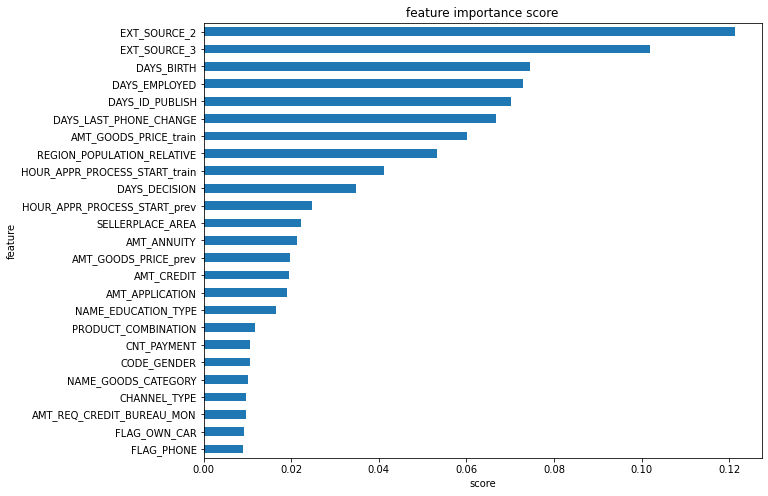

In [134]:
feat_importances = pd.Series(rforest.feature_importances_, index=x_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Features Selection

In [135]:
feat_importances = rforest.feature_importances_
cols = pd.Series(feat_importances, index=x_train.columns).nlargest(15).index.to_list()

In [136]:
x_train_sel = x_train[cols].copy()
x_test_sel = x_test[cols].copy()

# MODELING

## LOGISTIC REGRESSION

In [137]:
log_reg = LogisticRegression()
log_reg.fit(x_train_sel, y_train)
y_pred_train = log_reg.predict(x_train_sel)
y_pred_test = log_reg.predict(x_test_sel)

In [138]:
train_akurasi = accuracy_score(y_train, y_pred_train)
test_akurasi = accuracy_score(y_test, y_pred_test)

train_auc = roc_auc_score(y_train, y_pred_train)
test_auc = roc_auc_score(y_test, y_pred_test)

train_klasif = classification_report(y_train, y_pred_train)
test_klasif = classification_report(y_test, y_pred_test)

print("Training akurasi: {}".format(train_akurasi))
print("Testing akurasi: {}".format(train_akurasi))
print("Training AUC: {}".format(train_auc))
print("Testing AUC: {}".format(test_auc))
print("Training Klasifikasi report: \n{}".format(train_klasif))
print("Testing Klasifikasi report: \n{}".format(test_klasif))

Training akurasi: 0.63005476021214
Testing akurasi: 0.63005476021214
Training AUC: 0.6300543080335295
Testing AUC: 0.631157855475526
Training Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63    168145
           1       0.63      0.63      0.63    168048

    accuracy                           0.63    336193
   macro avg       0.63      0.63      0.63    336193
weighted avg       0.63      0.63      0.63    336193

Testing Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     71993
           1       0.63      0.63      0.63     72090

    accuracy                           0.63    144083
   macro avg       0.63      0.63      0.63    144083
weighted avg       0.63      0.63      0.63    144083



Hyperparameter tuning

In [139]:
param1 = [
    {
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-10,10,30),
        'class_weight': [{0:1, 1:3.33,}, "balanced"],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

In [140]:
rscv_lr = RandomizedSearchCV(log_reg, param1, cv = 5, n_jobs = -1, verbose= 0, random_state = 42, n_iter = 100)

rscv_lr.fit(x_train_sel, y_train)
y_pred_traint = rscv_lr.predict(x_train_sel)
y_pred_testt = rscv_lr.predict(x_test_sel)

In [141]:
train_akurasit = accuracy_score(y_train, y_pred_traint)
test_akurasit = accuracy_score(y_test, y_pred_testt)

train_auct = roc_auc_score(y_train, y_pred_traint)
test_auct = roc_auc_score(y_test, y_pred_testt)

train_klasift = classification_report(y_train, y_pred_traint)
test_klasift = classification_report(y_test, y_pred_testt)

print("Training akurasi: {}".format(train_akurasit))
print("Testing akurasi: {}".format(train_akurasit))
print("Training AUC: {}".format(train_auct))
print("Testing AUC: {}".format(test_auct))
print("Training Klasifikasi report: \n{}".format(train_klasift))
print("Testing Klasifikasi report: \n{}".format(test_klasift))

print(rscv_lr.best_params_)

Training akurasi: 0.6305693455842328
Testing akurasi: 0.6305693455842328
Training AUC: 0.630569635801591
Testing AUC: 0.6314266218762422
Training Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63    168145
           1       0.63      0.63      0.63    168048

    accuracy                           0.63    336193
   macro avg       0.63      0.63      0.63    336193
weighted avg       0.63      0.63      0.63    336193

Testing Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     71993
           1       0.63      0.63      0.63     72090

    accuracy                           0.63    144083
   macro avg       0.63      0.63      0.63    144083
weighted avg       0.63      0.63      0.63    144083

{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.0038566204211634724}


## DECISION TREE

In [142]:
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(x_train_sel, y_train)
yp_train = dtree.predict(x_train_sel)
yp_test = dtree.predict(x_test_sel)

In [143]:
train_akurasi2 = accuracy_score(y_train, yp_train)
test_akurasi2 = accuracy_score(y_test, yp_test)

train_auc2 = roc_auc_score(y_train, yp_train)
test_auc2 = roc_auc_score(y_test, yp_test)

train_klasif2 = classification_report(y_train, yp_train)
test_klasif2 = classification_report(y_test, yp_test)

print("Training akurasi: {}".format(train_akurasi2))
print("Testing akurasi: {}".format(train_akurasi2))
print("Training AUC: {}".format(train_auc2))
print("Testing AUC: {}".format(test_auc2))
print("Training Klasifikasi report: \n{}".format(train_klasif2))
print("Testing Klasifikasi report: \n{}".format(test_klasif2))

Training akurasi: 1.0
Testing akurasi: 1.0
Training AUC: 1.0
Testing AUC: 0.9736327821917968
Training Klasifikasi report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168145
           1       1.00      1.00      1.00    168048

    accuracy                           1.00    336193
   macro avg       1.00      1.00      1.00    336193
weighted avg       1.00      1.00      1.00    336193

Testing Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     71993
           1       0.95      0.99      0.97     72090

    accuracy                           0.97    144083
   macro avg       0.97      0.97      0.97    144083
weighted avg       0.97      0.97      0.97    144083



Hyperparameter tuning

In [144]:
param2 = [
    {
        'max_depth': list(range(1,21,3))+[None],
        'max_features': ['sqrt','log2', None],
        'min_samples_leaf': list(range(2,10)),
        'min_samples_split': list(range(2,10)),
        'class_weight': [{0:1, 1:3.33,}, "balanced"]
    }
]

In [145]:
rscv_dt = RandomizedSearchCV(dtree, param2, cv = 2, n_jobs = -1, verbose= 0, random_state = 42, n_iter = 100)

rscv_dt.fit(x_train_sel, y_train)
y_pred_traint2 = rscv_dt.predict(x_train_sel)
y_pred_testt2 = rscv_dt.predict(x_test_sel)

In [146]:
train_akurasit2 = accuracy_score(y_train, y_pred_traint2)
test_akurasit2 = accuracy_score(y_test, y_pred_testt2)

train_auct2 = roc_auc_score(y_train, y_pred_traint2)
test_auct2 = roc_auc_score(y_test, y_pred_testt2)

train_klasift2 = classification_report(y_train, y_pred_traint2)
test_klasift2 = classification_report(y_test, y_pred_testt2)

print("Training akurasi: {}".format(train_akurasit2))
print("Testing akurasi: {}".format(train_akurasit2))
print("Training AUC: {}".format(train_auct2))
print("Testing AUC: {}".format(test_auct2))
print("Training Klasifikasi report: \n{}".format(train_klasift2))
print("Testing Klasifikasi report: \n{}".format(test_klasift2))

print(rscv_dt.best_params_)

Training akurasi: 0.9943574077984967
Testing akurasi: 0.9943574077984967
Training AUC: 0.9943589186395958
Testing AUC: 0.9650634763995036
Training Klasifikasi report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    168145
           1       0.99      1.00      0.99    168048

    accuracy                           0.99    336193
   macro avg       0.99      0.99      0.99    336193
weighted avg       0.99      0.99      0.99    336193

Testing Klasifikasi report: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     71993
           1       0.94      0.99      0.97     72090

    accuracy                           0.97    144083
   macro avg       0.97      0.97      0.97    144083
weighted avg       0.97      0.97      0.97    144083

{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced'}


#TEST

In [147]:
app_test_null = app_test.isnull().sum().reset_index()
app_test_null.columns = ["features", "missing_value"]
app_test_null['Percentage'] = (app_test_null["missing_value"]/app_test.shape[0])*100
app_test_null.sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,47,COMMONAREA_AVG,33495,68.716150
1,61,COMMONAREA_MODE,33495,68.716150
2,75,COMMONAREA_MEDI,33495,68.716150
3,55,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,69,NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...,...,...
116,14,NAME_HOUSING_TYPE,0,0.000000
117,13,NAME_FAMILY_STATUS,0,0.000000
118,12,NAME_EDUCATION_TYPE,0,0.000000
119,11,NAME_INCOME_TYPE,0,0.000000


In [148]:
app_test.drop(app_train_to_drop, axis=1, inplace=True)

In [149]:
app_test.shape

(48744, 71)

In [150]:
app_test['EXT_SOURCE_3'].fillna(int(app_test['EXT_SOURCE_3'].mean()), inplace = True)
app_test['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(int(app_test['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()), inplace = True)
app_test['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(int(app_test['AMT_REQ_CREDIT_BUREAU_QRT'].mean()), inplace = True)
app_test['AMT_REQ_CREDIT_BUREAU_MON'].fillna(int(app_test['AMT_REQ_CREDIT_BUREAU_MON'].mean()), inplace = True)
app_test['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(int(app_test['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()), inplace = True)
app_test['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(int(app_test['AMT_REQ_CREDIT_BUREAU_DAY'].mean()), inplace = True)
app_test['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(int(app_test['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()), inplace = True)
app_test['NAME_TYPE_SUITE'].fillna(str(app_test['NAME_TYPE_SUITE'].mode(dropna=True)), inplace = True)
app_test['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(int(app_test['DEF_60_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_test['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(int(app_test['OBS_30_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_test['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(int(app_test['DEF_30_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_test['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(int(app_test['OBS_60_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
app_test['AMT_GOODS_PRICE'].fillna(int(app_test['AMT_GOODS_PRICE'].mean()), inplace = True)
app_test['AMT_ANNUITY'].fillna(int(app_test['AMT_ANNUITY'].mean()), inplace = True)
app_test['CNT_FAM_MEMBERS'].fillna(int(app_test['CNT_FAM_MEMBERS'].mean()), inplace = True)
app_test['EXT_SOURCE_2'].fillna(int(app_test['EXT_SOURCE_2'].mean()), inplace = True)
app_test['DAYS_LAST_PHONE_CHANGE'].fillna(int(app_test['DAYS_LAST_PHONE_CHANGE'].mean()), inplace = True)

In [151]:
print(app_test.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [152]:
app_test.duplicated().sum()

0

In [153]:
le = LabelEncoder()
app_test_clean = app_test.apply(lambda colname_obj: le.fit_transform(colname_obj))
app_test_clean.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,1,0,272,1320,2344,276,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,181,379,1820,93,...,0,0,0,0,0,0,0,0,0,3
2,2,0,1,1,1,0,402,1548,7133,366,...,0,0,0,0,0,0,0,0,1,4


In [154]:
atc_norm2 = app_test_clean.reset_index(drop=True).copy()
atc_imp2 = atc_norm2[['SK_ID_CURR']].copy()
atc_norm2.drop(['SK_ID_CURR'], axis=1, inplace = True)

for i in atc_norm2.columns:
  scale2 = StandardScaler().fit(atc_norm2[[i]])
  atc_norm2[i] = scale2.transform(atc_norm2[[i]])

In [155]:
atc_norm2.insert(loc=0,column='SK_ID_CURR',value=atc_imp['SK_ID_CURR'])

In [156]:
atc_merge2 = atc_norm2[['SK_ID_CURR', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'CODE_GENDER', 'FLAG_DOCUMENT_3','DAYS_ID_PUBLISH', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR','HOUR_APPR_PROCESS_START', 'REGION_POPULATION_RELATIVE', 'FLAG_PHONE','FLAG_DOCUMENT_16', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_GOODS_PRICE']].reset_index(drop = True)

In [157]:
df_join2 = atc_merge2.merge(pac_merge, left_on='SK_ID_CURR', right_on='SK_ID_CURR', suffixes=('_train', '_prev'))

In [158]:
idx_join2 = df_join2[['SK_ID_CURR','SK_ID_PREV']]
df_join2.drop(['SK_ID_CURR','SK_ID_PREV'], axis=1, inplace=True)

In [159]:
df_test = df_join2[cols].copy()

Logreg

In [160]:
df_test.shape

(158852, 15)

In [161]:
test_param = {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.0038566204211634724}

In [162]:
dflog_reg = LogisticRegression(** test_param)
dflog_reg.fit(x_train_sel, y_train)
dfy_pred_test = dflog_reg.predict(df_test)

In [163]:
df_test.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE_train',
       'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START_train',
       'DAYS_DECISION', 'HOUR_APPR_PROCESS_START_prev', 'SELLERPLACE_AREA',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE_prev', 'AMT_CREDIT'],
      dtype='object')

In [164]:
hasil = idx_join2[['SK_ID_CURR']].copy()
hasil['y'] =  dfy_pred_test

In [165]:
hasil.head(3)

,SK_ID_CURR,y
0,0,0
1,1,1
2,2,0


In [166]:
hasil['y'].value_counts()

0    95278
1    63574
Name: y, dtype: int64

In [167]:
hasil['y'].value_counts(normalize=True)

0    0.599791
1    0.400209
Name: y, dtype: float64

In [168]:
test_param2 = {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced'}

In [169]:
dtree2 = DecisionTreeClassifier(random_state = 42)
dtree2.fit(x_train_sel, y_train)
yp_test2 = dtree2.predict(df_test)

In [170]:
hasil2 = idx_join2[['SK_ID_CURR']].copy()
hasil2['y'] =  yp_test2

In [171]:
hasil2['y'].value_counts(normalize=True)

0    0.831812
1    0.168188
Name: y, dtype: float64